In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/shimla-tourism/Shimla_dataset.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
# Extract year and month from the 'Month' column
df['Year'] = df['Month'].dt.year
df['Month'] = df['Month'].dt.month
df.head()

,Month,Indian Tourist,Foreigner Tourist,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,...,Low Humidity:,Avg Humidity:,High Pressure:,Low Pressure:,Avg Pressure:,Places to visit in Shimla: (Worldwide) Trends,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
0,1,165247,7065,172312,5076,5461.25,2549.17,39,36,11,...,91%,98%,30.11,30.02,30.07,10,0,0,17,2010
1,2,155554,6306,161860,5076,5461.25,2549.17,16,32,16,...,40%,74%,30.11,29.88,29.99,10,86,46,17,2010
2,3,176551,12410,188961,5076,5461.25,2549.17,35,62,17,...,38%,73%,30.08,29.50,29.80,14,28,66,22,2010
3,4,351393,12207,363600,5076,5461.25,2549.17,39,100,21,...,15%,50%,29.89,29.38,29.66,10,28,0,23,2010
4,5,360096,9534,369630,5076,5461.25,2549.17,17,12,24,...,17%,44%,29.74,29.23,29.53,14,0,39,24,2010


<Axes: xlabel='Month'>

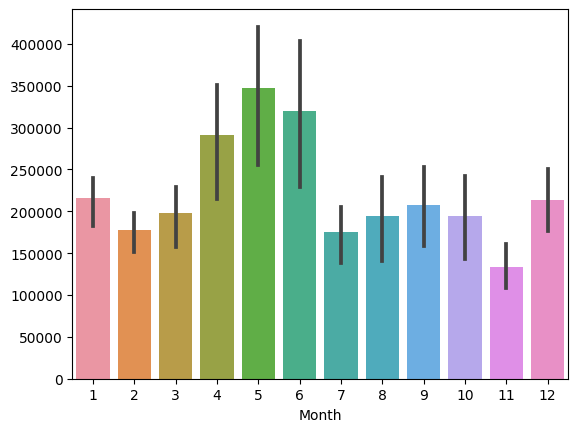

In [4]:
#Plotting to analyse effects of covid
import seaborn as sns
flights_wide = df.pivot(columns="Month", values="Indian Tourist")
sns.barplot(flights_wide)


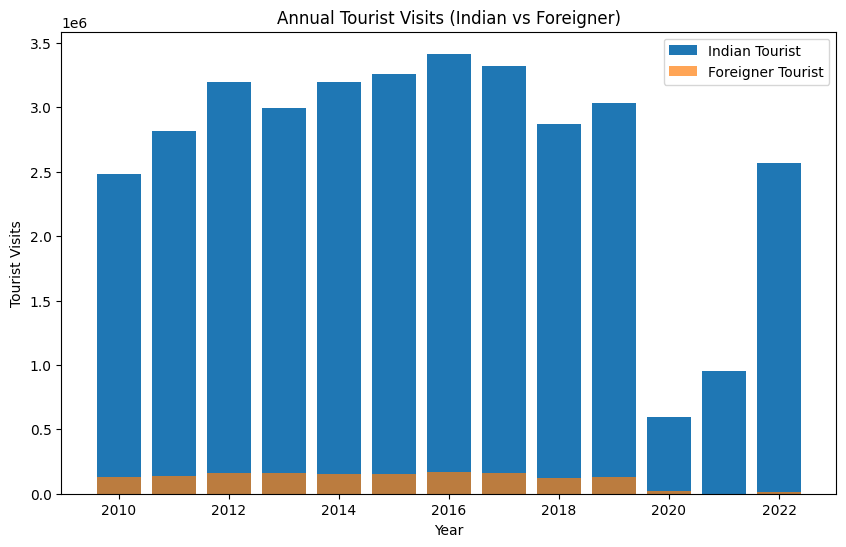

In [5]:
# Group by year and sum the tourist columns
annual_tourist_data = df.groupby('Year')[['Indian Tourist', 'Foreigner Tourist']].sum()
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(annual_tourist_data.index, annual_tourist_data['Indian Tourist'], label='Indian Tourist')
plt.bar(annual_tourist_data.index, annual_tourist_data['Foreigner Tourist'], label='Foreigner Tourist', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Tourist Visits')
plt.title('Annual Tourist Visits (Indian vs Foreigner)')
plt.legend()
plt.show()

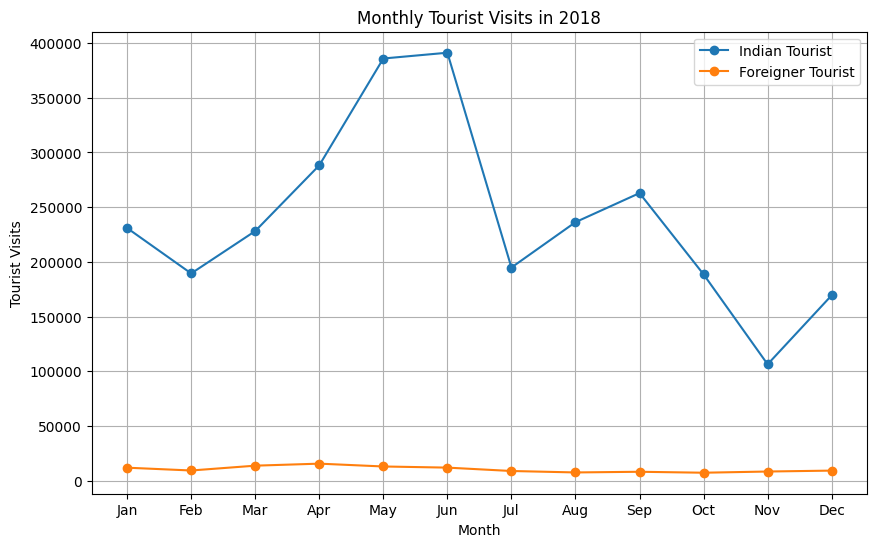

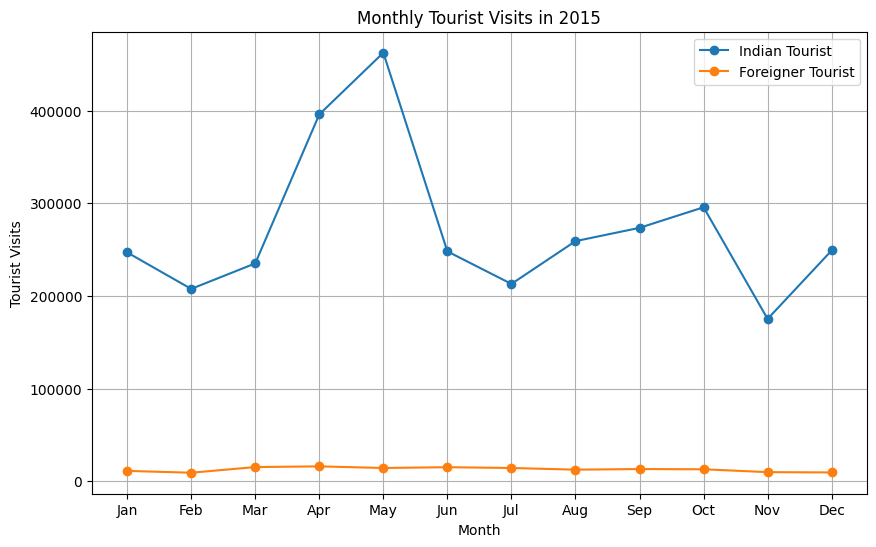

In [6]:
# Filter data for the year 2018
df_2018 = df[df['Year'] == 2018]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_2018['Month'], df_2018['Indian Tourist'], marker='o', label='Indian Tourist')
plt.plot(df_2018['Month'], df_2018['Foreigner Tourist'], marker='o', label='Foreigner Tourist')
plt.xlabel('Month')
plt.ylabel('Tourist Visits')
plt.title('Monthly Tourist Visits in 2018')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Filter data for the year 2015
df_2015 = df[df['Year'] == 2015]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_2015['Month'], df_2015['Indian Tourist'], marker='o', label='Indian Tourist')
plt.plot(df_2015['Month'], df_2015['Foreigner Tourist'], marker='o', label='Foreigner Tourist')
plt.xlabel('Month')
plt.ylabel('Tourist Visits')
plt.title('Monthly Tourist Visits in 2015')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df['High Humidity:'] = df['High Humidity:'].astype('str').str.replace('%', '').astype('int64')
df['Low Humidity:'] = df['Low Humidity:'].astype('str').str.replace('%', '').astype('int64')
df['Avg Humidity:'] = df['Avg Humidity:'].astype('str').str.replace('%', '').astype('int64')

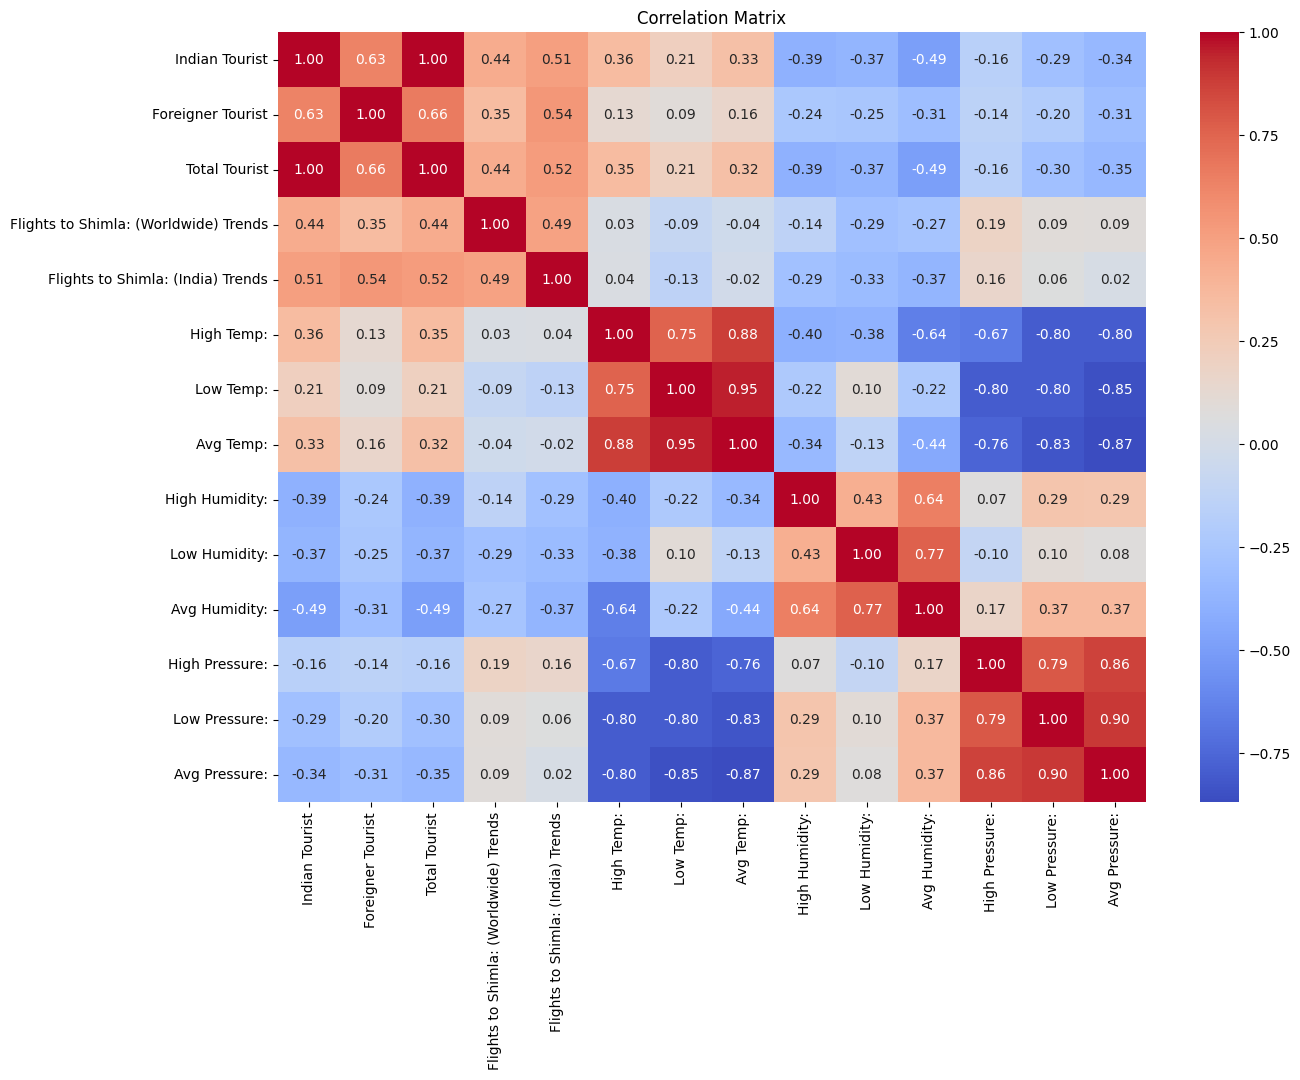

In [8]:
dfg = df.copy()
# Set the 'Month' column as the index and convert it to datetime
dfg['Month'] = pd.to_datetime(dfg['Month'])
#dfg.set_index('Month', inplace=True)

# Select relevant columns for further analysis

# selected_columns = ['Indian Tourist', 'Foreigner Tourist', 'Total Tourist', 'Per capita Income(India) monthly',
#                     'Flights to Shimla: (Worldwide) Trends',
#                     'Train to Shimla: Trends', 'Hotels in Shimla: Trends', 'High Temp:', 'Low Temp:', 'Avg Temp:',
#                     'High Humidity:', 'Low Humidity:', 'Avg Humidity:', 'High Pressure:', 'Low Pressure:', 'Avg Pressure:',
#                     'Places to visit in Shimla: (Worldwide) Trends', 'Bus service in Shimla: (Worldwide) Trends',
#                     'Shimla: (Worldwide)Trends']

selected_columns = ['Indian Tourist', 'Foreigner Tourist', 'Total Tourist', 'Flights to Shimla: (Worldwide) Trends',
                   'Flights to Shimla: (India) Trends', 'High Temp:', 'Low Temp:', 'Avg Temp:',
                   'High Humidity:', 'Low Humidity:', 'Avg Humidity:', 'High Pressure:', 'Low Pressure:',
                   'Avg Pressure:']
df_selected = dfg[selected_columns]
# Heatmap to visualize the correlation between numerical columns
correlation_matrix = df_selected.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The plot exhibits a clear seasonal trend in the number of Indian and foreign tourists visiting a particular destination, with peak values occurring in the months of May and June. These peak months likely coincide with favorable weather conditions or holiday periods, making them attractive for tourism.

However, a conspicuous and sharp decline is evident in the data for the year 2020 to 2021. This decline is primarily attributed to the global outbreak of the COVID-19 pandemic, which led to widespread travel restrictions, lockdowns, and a general reluctance to travel.

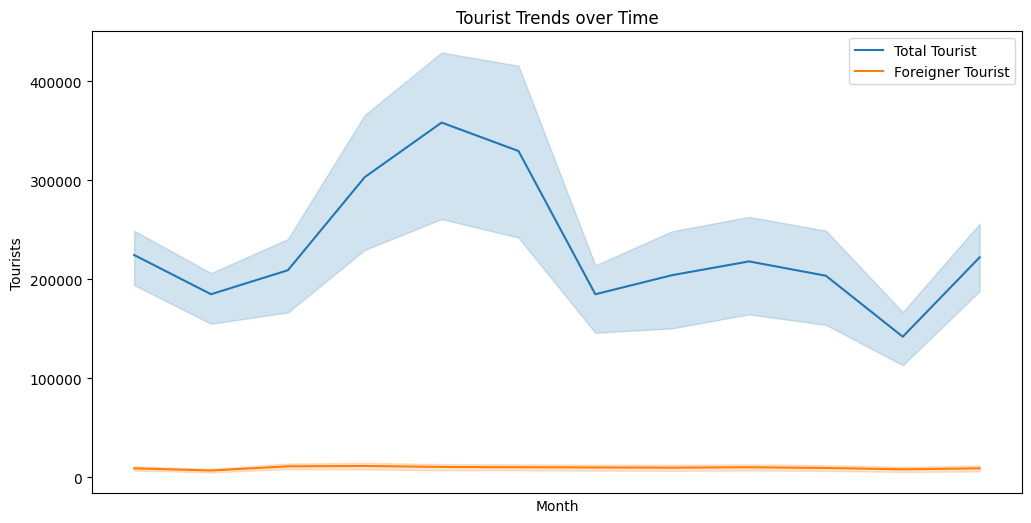

In [9]:
#Line plot for Indian Tourist and Foreigner Tourist over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Tourist', data=dfg, label='Total Tourist')
sns.lineplot(x='Month', y='Foreigner Tourist', data=dfg, label='Foreigner Tourist')
plt.xlabel('Month')
plt.ylabel('Tourists')
plt.title('Tourist Trends over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

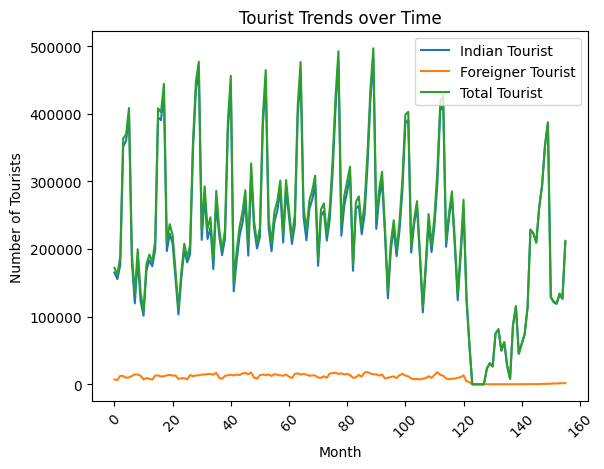

In [10]:
# Trends Over Time
plt.figure(figsize=(12, 6))
df[['Indian Tourist', 'Foreigner Tourist', 'Total Tourist']].plot()
plt.xlabel('Month')
plt.ylabel('Number of Tourists')
plt.title('Tourist Trends over Time')
plt.xticks(rotation=45)
plt.show()

In [11]:
df.head()

,Month,Indian Tourist,Foreigner Tourist,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,...,Low Humidity:,Avg Humidity:,High Pressure:,Low Pressure:,Avg Pressure:,Places to visit in Shimla: (Worldwide) Trends,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
0,1,165247,7065,172312,5076,5461.25,2549.17,39,36,11,...,91,98,30.11,30.02,30.07,10,0,0,17,2010
1,2,155554,6306,161860,5076,5461.25,2549.17,16,32,16,...,40,74,30.11,29.88,29.99,10,86,46,17,2010
2,3,176551,12410,188961,5076,5461.25,2549.17,35,62,17,...,38,73,30.08,29.50,29.80,14,28,66,22,2010
3,4,351393,12207,363600,5076,5461.25,2549.17,39,100,21,...,15,50,29.89,29.38,29.66,10,28,0,23,2010
4,5,360096,9534,369630,5076,5461.25,2549.17,17,12,24,...,17,44,29.74,29.23,29.53,14,0,39,24,2010


<Figure size 1200x600 with 0 Axes>

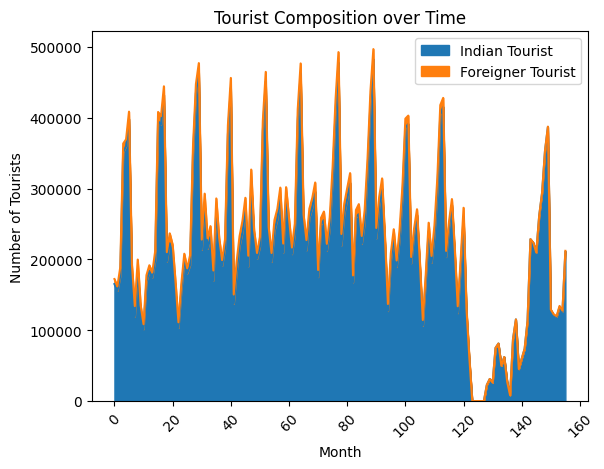

In [12]:
# Stacked Area Plot for Tourist Composition
tourist_composition_columns = ['Indian Tourist', 'Foreigner Tourist']
df_tourist_composition = df[tourist_composition_columns]

plt.figure(figsize=(12, 6))
df_tourist_composition.plot(kind='area', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Tourists')
plt.title('Tourist Composition over Time')
plt.xticks(rotation=45)
plt.show()

The line plot offers insights into the temporal trends of economic indicators in Himachal Pradesh, specifically GSDP values and Per Capita Income, along with a comparison to the national Per Capita Income in India.

the graph provides an overview of the trends in GDP per capita income over time, specifically focusing on the value of the rupee and its impact on the price of the rupee.

<Figure size 2000x1000 with 0 Axes>

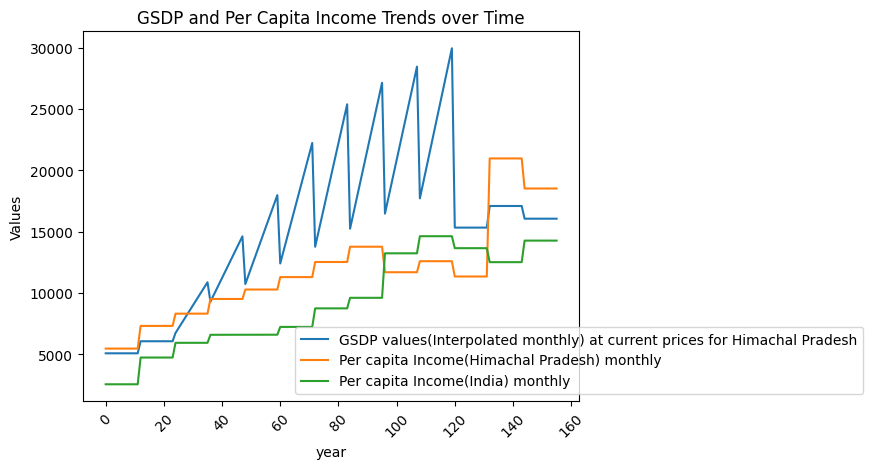

In [13]:
# Create the plot
plt.figure(figsize=(20, 10))
ax = df[['GSDP values(Interpolated monthly) at current prices for Himachal Pradesh',
              'Per capita Income(Himachal Pradesh) monthly', 'Per capita Income(India) monthly']].plot()

# Set labels and title
plt.xlabel('year')
plt.ylabel('Values')
plt.title('GSDP and Per Capita Income Trends over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend outside the plot to avoid overlap
ax.legend(loc='lower center', bbox_to_anchor=(1, 0))

plt.show()

<Figure size 1800x600 with 0 Axes>

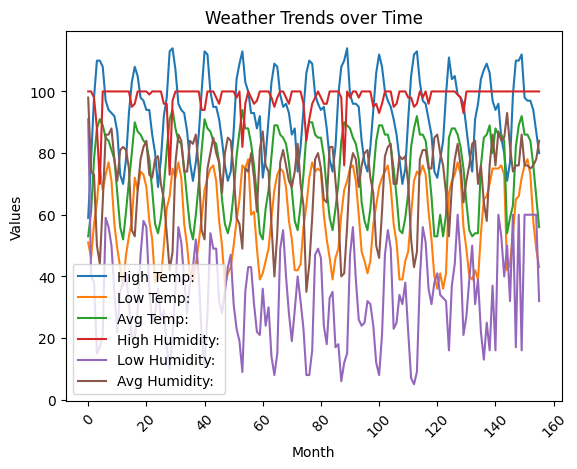

In [14]:
# 3. Line Plot for Weather Trends
plt.figure(figsize=(18, 6))
df_selected[['High Temp:', 'Low Temp:', 'Avg Temp:', 'High Humidity:', 'Low Humidity:', 'Avg Humidity:']].plot()
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Weather Trends over Time')
plt.xticks(rotation=45)
plt.show()

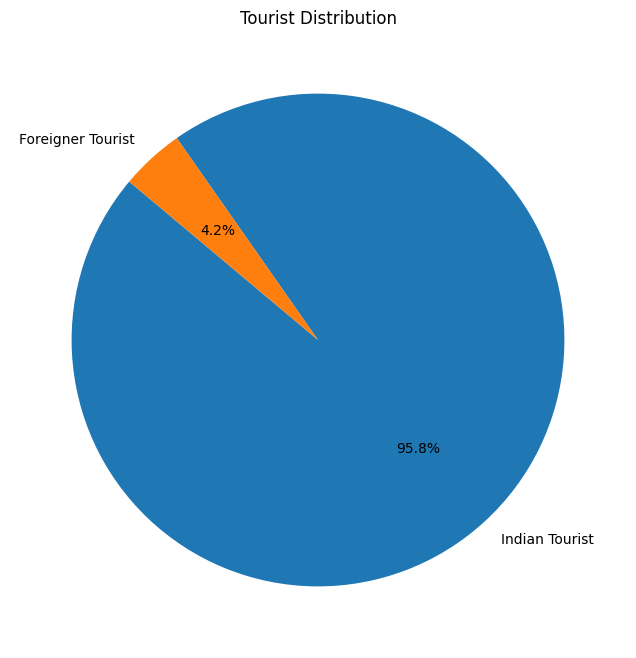

In [15]:
#  Pie Chart for Tourist Distribution
tourist_distribution = df[['Indian Tourist', 'Foreigner Tourist']].sum()
labels = ['Indian Tourist', 'Foreigner Tourist']

plt.figure(figsize=(8, 8))
plt.pie(tourist_distribution, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Tourist Distribution')
plt.show()

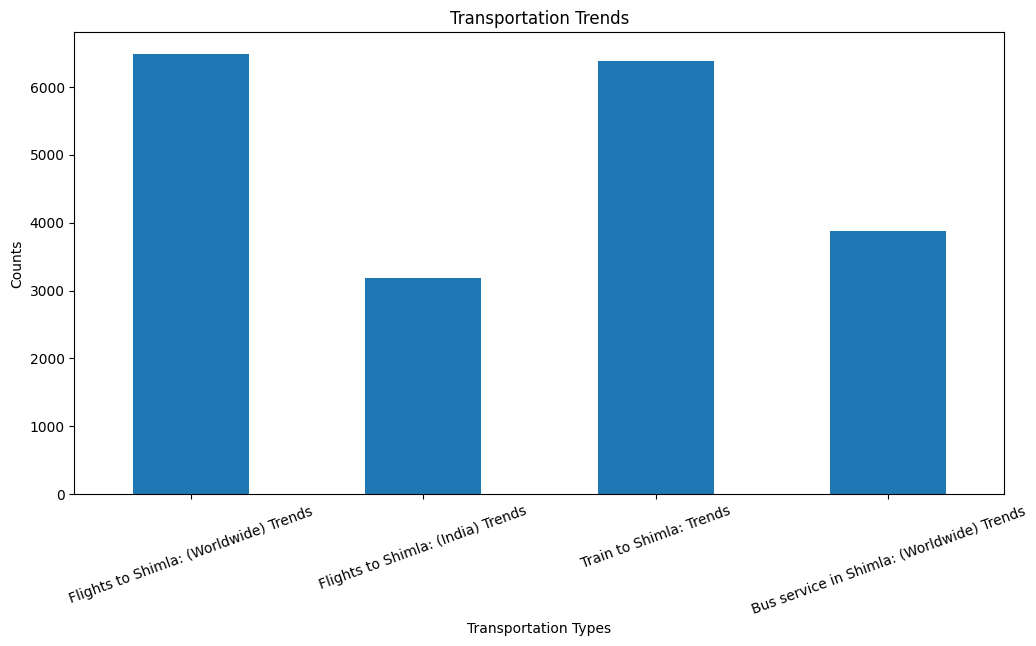

In [16]:
# Bar Plot for Flights and Transportation Trends
transportation_columns = ['Flights to Shimla: (Worldwide) Trends', 'Flights to Shimla: (India) Trends',
                          'Train to Shimla: Trends', 'Bus service in Shimla: (Worldwide) Trends']
df_transportation = df[transportation_columns]

plt.figure(figsize=(12, 6))
df_transportation.sum().plot(kind='bar')
plt.xlabel('Transportation Types')
plt.ylabel('Counts')
plt.title('Transportation Trends')
plt.xticks(rotation=20)
plt.show()

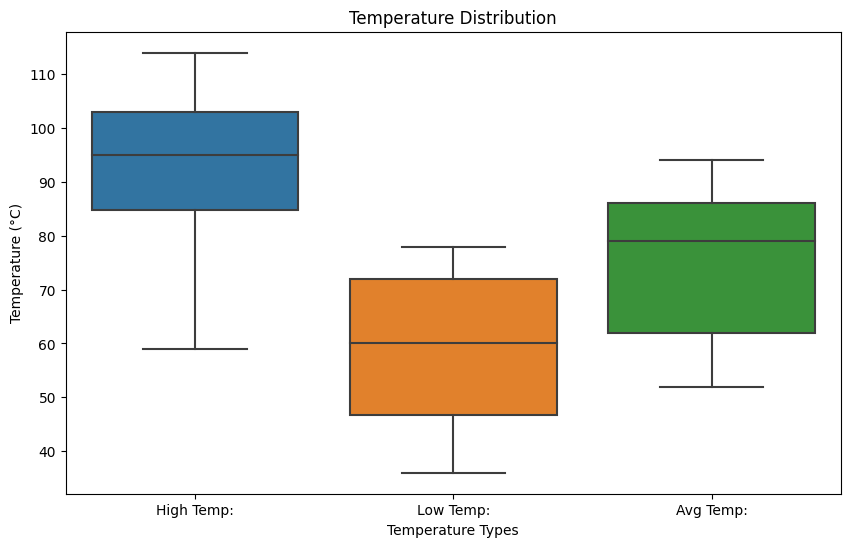

In [17]:
# Box plot for temperature
temperature_columns = ['High Temp:', 'Low Temp:', 'Avg Temp:']
df_temperature = df[temperature_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_temperature)
plt.xlabel('Temperature Types')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


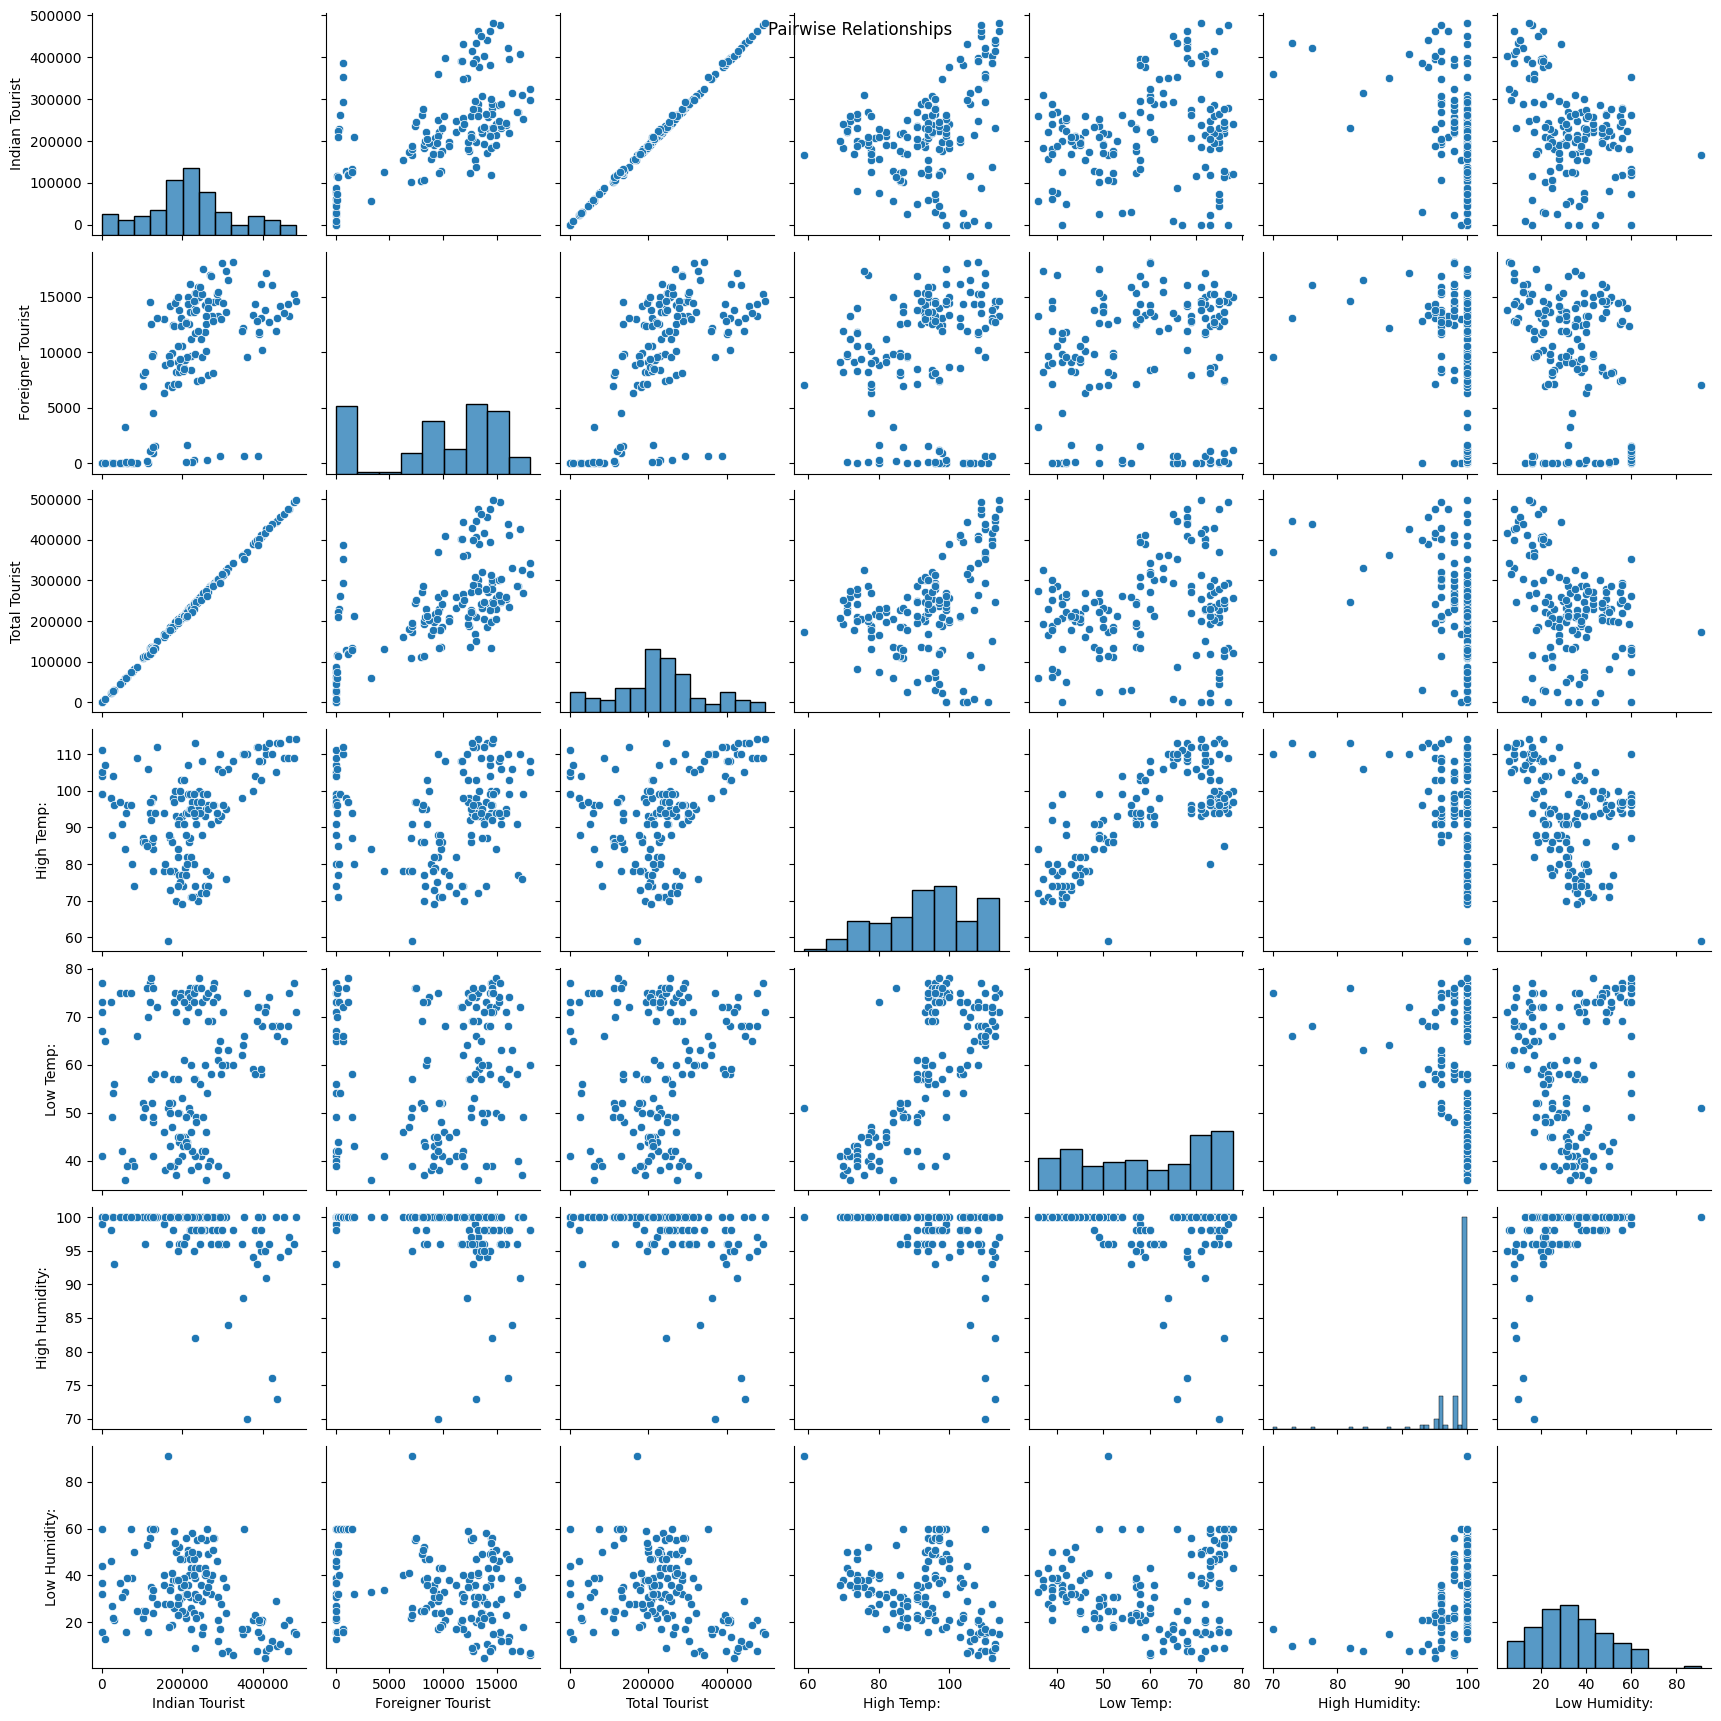

In [18]:
# Scatter Plot Matrix
scatter_columns = ['Indian Tourist', 'Foreigner Tourist', 'Total Tourist', 'High Temp:', 'Low Temp:', 'High Humidity:', 'Low Humidity:']
df_scatter = df[scatter_columns]

sns.pairplot(df_scatter)
plt.suptitle('Pairwise Relationships')
plt.show()

In [19]:
df['High Temp:'] = (df['High Temp:'] - 32) * (5/9)
df['Low Temp:'] = (df['Low Temp:'] - 32) * (5/9)
df['Avg Temp:'] = (df['Avg Temp:'] - 32) * (5/9)

In [20]:
df=df.drop(columns=['Low Humidity:','High Humidity:','Low Pressure:','High Pressure:','High Temp:','Low Temp:','Places to visit in Shimla: (Worldwide) Trends'])

In [21]:
df.head()

,Month,Indian Tourist,Foreigner Tourist,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
0,1,165247,7065,172312,5076,5461.25,2549.17,39,36,11,46,11.666667,98,30.07,0,0,17,2010
1,2,155554,6306,161860,5076,5461.25,2549.17,16,32,16,37,16.111111,74,29.99,86,46,17,2010
2,3,176551,12410,188961,5076,5461.25,2549.17,35,62,17,63,25.555556,73,29.80,28,66,22,2010
3,4,351393,12207,363600,5076,5461.25,2549.17,39,100,21,67,31.111111,50,29.66,28,0,23,2010
4,5,360096,9534,369630,5076,5461.25,2549.17,17,12,24,77,32.777778,44,29.53,0,39,24,2010


In [22]:
df.shape

(156, 18)

In [23]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00


In [24]:
import pmdarima as pm

In [25]:
import matplotlib.pyplot as plt

In [26]:
df.tail()

,Month,Indian Tourist,Foreigner Tourist,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
151,8,121224,1180,122404,16057,18518.92,14268.33,25,6,50,28,30.000000,76,29.82,45,10,65,2022
152,9,118791,1145,119936,16057,18518.92,14268.33,33,9,57,34,28.888889,75,29.88,64,17,66,2022
153,10,132786,1545,134331,16057,18518.92,14268.33,37,9,56,30,24.444444,76,29.97,47,0,60,2022
154,11,126147,1504,127651,16057,18518.92,14268.33,47,13,69,35,18.888889,78,30.12,69,17,63,2022
155,12,210430,1683,212113,16057,18518.92,14268.33,44,12,76,45,13.333333,84,30.05,77,15,84,2022


In [27]:
df1=df
df2=df

In [28]:
df1=df.drop(columns=['Indian Tourist','Foreigner Tourist'])

In [29]:
df1.head()

,Month,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
0,1,172312,5076,5461.25,2549.17,39,36,11,46,11.666667,98,30.07,0,0,17,2010
1,2,161860,5076,5461.25,2549.17,16,32,16,37,16.111111,74,29.99,86,46,17,2010
2,3,188961,5076,5461.25,2549.17,35,62,17,63,25.555556,73,29.80,28,66,22,2010
3,4,363600,5076,5461.25,2549.17,39,100,21,67,31.111111,50,29.66,28,0,23,2010
4,5,369630,5076,5461.25,2549.17,17,12,24,77,32.777778,44,29.53,0,39,24,2010


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data (assuming your data is in a DataFrame called df)
# Filter out 2020 and 2021 data for training the regression model
train_data = df1[(df1['Year'] != 2020) & (df1['Year'] != 2021) & (df1['Year'] != 2022)]
test_data = df1[(df1['Year'] == 2020) | (df1['Year'] == 2021)]
test_data=test_data.drop(columns=['Total Tourist'])
train_data1=train_data.copy()
y=train_data1.pop('Total Tourist')
# Create and train the regression model
model = LinearRegression()
model.fit(train_data1,y)

# Predict missing values for 2020 and 2021
predicted_values = model.predict(test_data)

# Fill missing values with predicted values
missing_rows_2020 = test_data['Year'] == 2020
missing_rows_2021 = test_data['Year'] == 2021
test_data.loc[missing_rows_2020, 'Total Tourist'] = predicted_values[missing_rows_2020]
test_data.loc[missing_rows_2021, 'Total Tourist'] = predicted_values[missing_rows_2021]

# Concatenate the imputed data back to the original DataFrame
imputed_df = pd.concat([train_data, test_data], axis=0)

# Now, imputed_df contains the DataFrame with missing values in 'Indian Tourist' column imputed using regression.

In [31]:
imputed_df.tail()

,Month,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
139,8,303669.409591,17092,20971.17,12510.75,18,4,29,21,26.666667,86,29.74,46,34,45,2021
140,9,367545.077493,17092,20971.17,12510.75,37,11,39,28,31.111111,76,29.81,39,22,51,2021
141,10,360937.089818,17092,20971.17,12510.75,39,13,42,31,30.000000,87,30.00,69,10,49,2021
142,11,369819.193195,17092,20971.17,12510.75,34,11,45,33,30.000000,84,30.00,68,14,49,2021
143,12,442103.397495,17092,20971.17,12510.75,30,8,56,50,28.888889,85,30.12,73,36,78,2021


In [32]:
df1[df1['Year']==2022]

,Month,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
144,1,223490,16057,18518.92,14268.33,24,8,47,39,12.222222,93,30.06,37,0,86,2022
145,2,209688,16057,18518.92,14268.33,48,14,57,37,15.000000,82,30.04,83,34,72,2022
146,3,261563,16057,18518.92,14268.33,57,17,69,46,17.222222,74,30.04,52,10,70,2022
147,4,294487,16057,18518.92,14268.33,68,19,78,56,27.777778,76,29.87,68,28,77,2022
148,5,353513,16057,18518.92,14268.33,61,18,100,62,31.666667,76,29.78,86,27,95,2022
149,6,387518,16057,18518.92,14268.33,40,10,92,66,33.333333,86,29.59,95,11,95,2022
150,7,129273,16057,18518.92,14268.33,31,7,58,33,30.000000,76,29.69,47,0,69,2022
151,8,122404,16057,18518.92,14268.33,25,6,50,28,30.000000,76,29.82,45,10,65,2022
152,9,119936,16057,18518.92,14268.33,33,9,57,34,28.888889,75,29.88,64,17,66,2022
153,10,134331,16057,18518.92,14268.33,37,9,56,30,24.444444,76,29.97,47,0,60,2022


In [33]:
ftrain=pd.concat([imputed_df,df1[df1['Year']==2022]],axis=0)

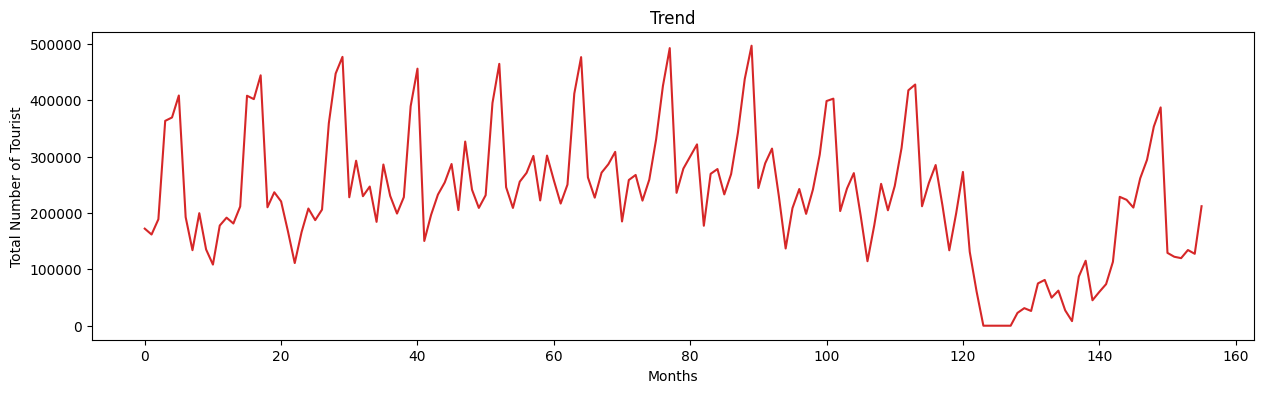

In [34]:
#Plot showing Trend before linear regression
def plot_df(df, x, y, title="", xlabel='Months', ylabel='Total Number of Tourist', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df.index, y=df['Total Tourist'], title='Trend')

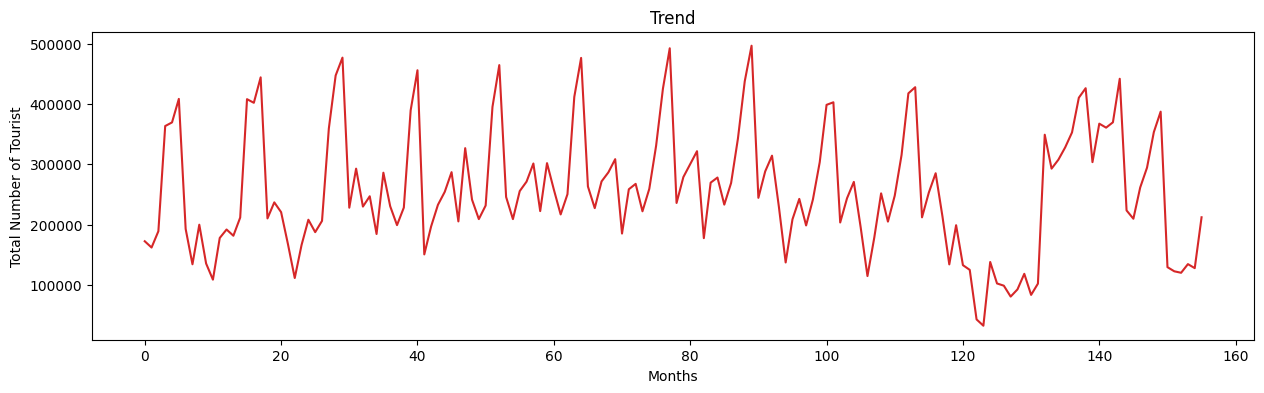

In [35]:
#Plot showing Trend after linear regression
def plot_df(ftrain, x, y, title="", xlabel='Months', ylabel='Total Number of Tourist', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(ftrain, x=ftrain.index, y=ftrain['Total Tourist'], title='Trend')


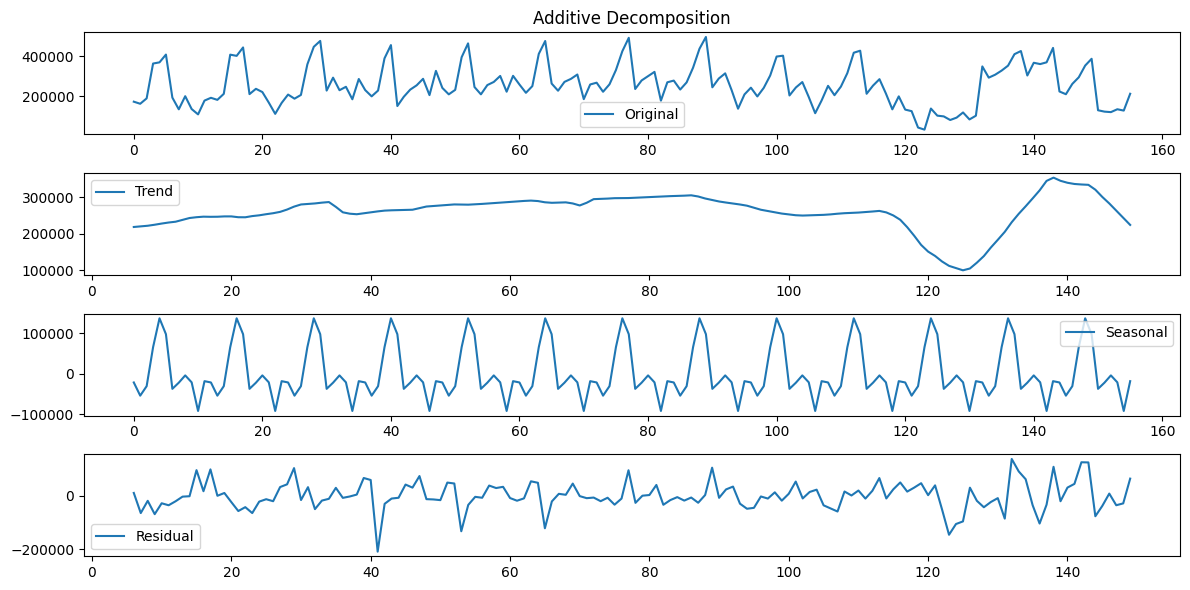

In [36]:
import numpy as np
# Columns to perform time series decomposition on
column_to_decompose = ['Total Tourist']
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform time series decomposition and plot the results
for column in column_to_decompose:
    # Add a constant to ensure all values are positive
    constant = 1  # You can adjust this constant based on your data
    ftrain[column] = ftrain[column] + constant

    # Perform decomposition with the added constant
    result = seasonal_decompose(ftrain[column], model='additive', period=12)  # Assuming monthly data with a yearly seasonality

    # Calculate components after removing the constant
    trend = result.trend - constant
    seasonal = result.seasonal - constant
    residual = result.resid - constant

    # Plot the decomposition components
    plt.figure(figsize=(12, 6))

    plt.subplot(411)
    plt.title('Additive Decomposition')
    plt.plot(result.observed - constant, label='Original')
    plt.legend()
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend()
    plt.tight_layout()
    plt.show()

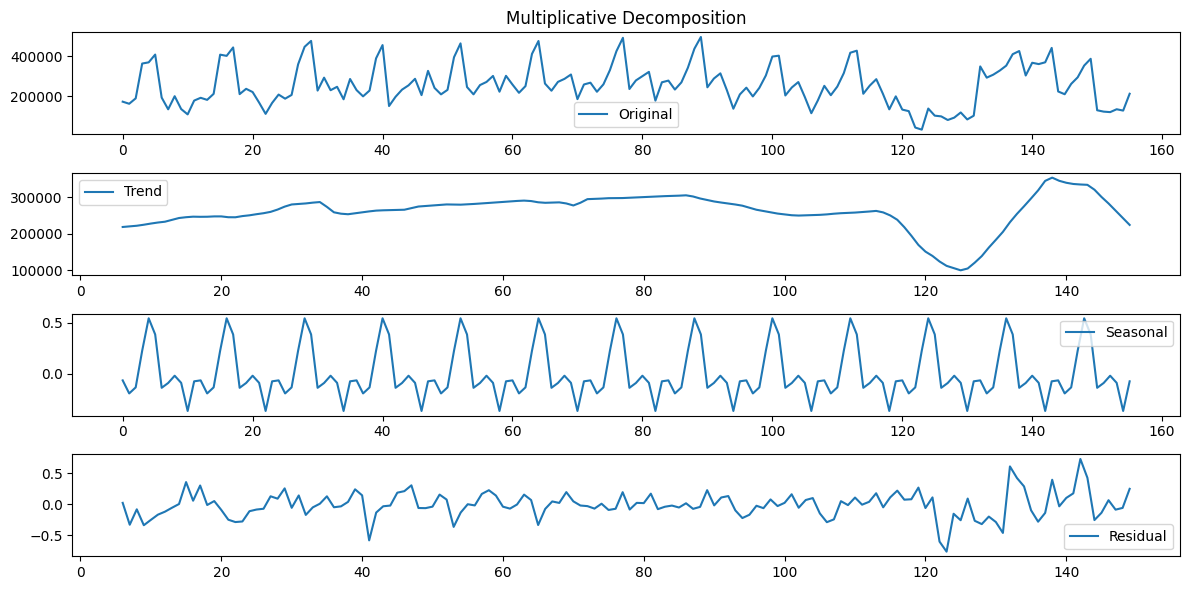

In [37]:
# import numpy as np
# df = df[(df['Year'] != 2020) & (df['Year'] != 2021)]
# Assuming your data is in a DataFrame called df
# Columns to perform time series decomposition on
column_to_decompose = ['Total Tourist']
# from statsmodels.tsa.seasonal import seasonal_decompose
# Perform time series decomposition and plot the results
for column in column_to_decompose:
    # Add a constant to ensure all values are positive
    constant = 1  # You can adjust this constant based on your data
    ftrain[column] = ftrain[column] + constant

    # Perform decomposition with the added constant
    result = seasonal_decompose(ftrain[column], model='multiplicative', period=12)  # Assuming monthly data with a yearly seasonality

    # Calculate components after removing the constant
    trend = result.trend - constant
    seasonal = result.seasonal - constant
    residual = result.resid - constant

    # Plot the decomposition components
    plt.figure(figsize=(12, 6))
    # plt.title('Multiplicative Decomposition')
    plt.subplot(411)
    plt.title('Multiplicative Decomposition')
    plt.plot(result.observed - constant, label='Original')
    plt.legend()
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [38]:
train_data = df1[(df1['Year'] != 2020) & (df1['Year'] != 2021) & (df1['Year'] != 2022)]
test_data = df1[(df1['Year'] == 2020) | (df1['Year'] == 2021)]
test_data=test_data.drop(columns=['Total Tourist'])
train_data1=train_data.copy()
y=train_data1.pop('Total Tourist')

model0 = pm.auto_arima(train_data['Total Tourist'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=12, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3040.311, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3085.970, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3017.647, Time=0.62 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3017.420, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3354.787, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3057.192, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3017.916, Time=0.86 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3002.895, Time=0.44 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3004.786, Time=1.86 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=3024.024, Time=0.32 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2998.748, Time=0.43 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3015.352, Time=0.19 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=2999.265, Time=3.28 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3001.461, Time=0.79 sec
 ARIMA(1,0,0)(0,0,2

In [39]:
import statsmodels.api as sm

In [40]:
model0.fit(train_data['Total Tourist'])

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [41]:
forecast2021=model0.predict(n_periods=24, return_conf_int=True)

In [42]:
forecast2021_df = pd.DataFrame(forecast2021[0],columns=['Prediction'])

In [43]:
forecast2021_df

,Prediction
120,254388.773270
121,225833.951558
122,249469.412217
123,278638.328176
124,340705.735115
125,344471.266646
126,226143.557093
127,244893.256550
128,267665.582151
129,253547.064925


In [44]:
# Fill missing values with predicted values
missing_rows_2020 = test_data['Year'] == 2020
missing_rows_2021 = test_data['Year'] == 2021
test_data.loc[missing_rows_2020, 'Total Tourist'] = forecast2021_df.head(12)['Prediction'].values
test_data.loc[missing_rows_2021, 'Total Tourist'] = forecast2021_df.tail(12)['Prediction'].values

# Concatenate the imputed data back to the original DataFrame
imputed_df = pd.concat([train_data, test_data], axis=0)

In [45]:
df2[df2['Year']==2022]

,Month,Indian Tourist,Foreigner Tourist,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
144,1,223327,163,223490,16057,18518.92,14268.33,24,8,47,39,12.222222,93,30.06,37,0,86,2022
145,2,209521,167,209688,16057,18518.92,14268.33,48,14,57,37,15.000000,82,30.04,83,34,72,2022
146,3,261218,345,261563,16057,18518.92,14268.33,57,17,69,46,17.222222,74,30.04,52,10,70,2022
147,4,293821,666,294487,16057,18518.92,14268.33,68,19,78,56,27.777778,76,29.87,68,28,77,2022
148,5,352817,696,353513,16057,18518.92,14268.33,61,18,100,62,31.666667,76,29.78,86,27,95,2022
149,6,386845,673,387518,16057,18518.92,14268.33,40,10,92,66,33.333333,86,29.59,95,11,95,2022
150,7,128342,931,129273,16057,18518.92,14268.33,31,7,58,33,30.000000,76,29.69,47,0,69,2022
151,8,121224,1180,122404,16057,18518.92,14268.33,25,6,50,28,30.000000,76,29.82,45,10,65,2022
152,9,118791,1145,119936,16057,18518.92,14268.33,33,9,57,34,28.888889,75,29.88,64,17,66,2022
153,10,132786,1545,134331,16057,18518.92,14268.33,37,9,56,30,24.444444,76,29.97,47,0,60,2022


In [46]:
ftrainarima=pd.concat([imputed_df,df2[df2['Year']==2022]],axis=0)

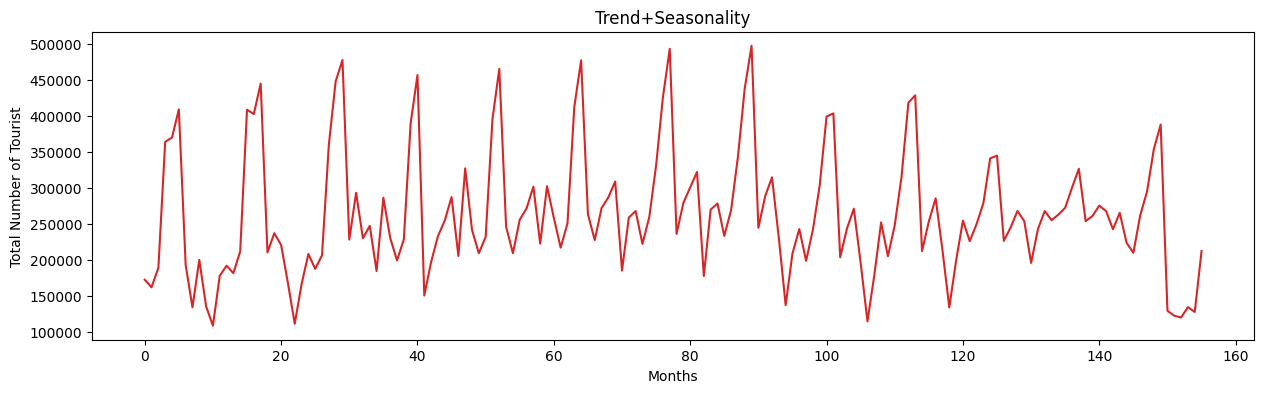

In [47]:
#Plot showing Trend after ARIMA in 2020 and 2021
def plot_df(ftrainarima, x, y, title="", xlabel='Months', ylabel='Total Number of Tourist', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(ftrainarima, x=ftrainarima.index, y=ftrainarima['Total Tourist'], title='Trend+Seasonality')

In [48]:
final_df = ftrainarima

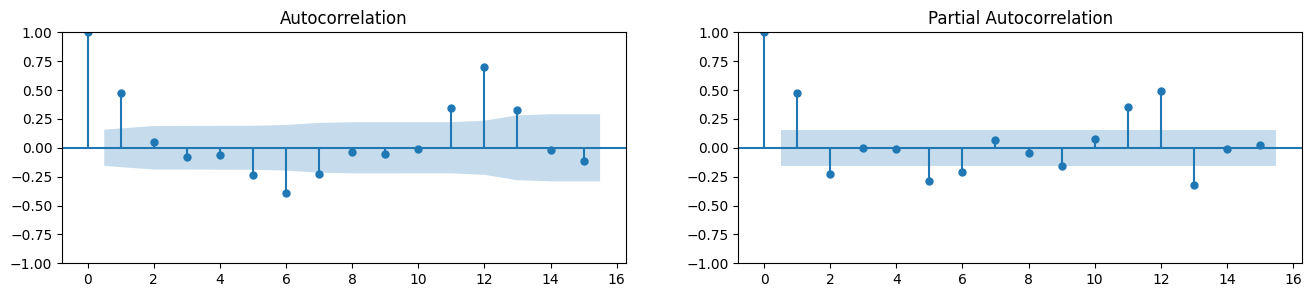

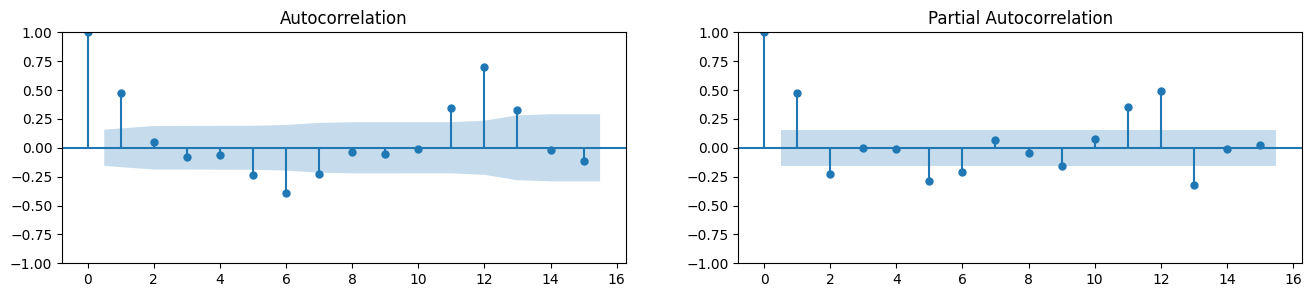

In [49]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(final_df['Total Tourist'].tolist(), lags=15, ax=axes[0])
plot_pacf(final_df['Total Tourist'].tolist(), lags=15, ax=axes[1])

In [50]:
model = pm.auto_arima(final_df['Total Tourist'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=12, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3936.443, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3991.987, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3902.930, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3901.999, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4354.199, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3951.201, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3902.669, Time=0.53 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3884.767, Time=0.45 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3886.738, Time=2.01 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=3916.104, Time=0.33 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=3876.169, Time=0.55 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3896.218, Time=0.26 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3876.938, Time=2.06 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3882.804, Time=1.09 sec
 ARIMA(1,0,0)(0,0,2

In [51]:
model.fit(final_df['Total Tourist'])

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [52]:
forecast=model.predict(n_periods=12, return_conf_int=True)

In [53]:
forecast_df = pd.DataFrame(forecast[0],columns=['Prediction'])

In [54]:
forecast_df

,Prediction
156,215945.132240
157,221857.979430
158,259039.380811
159,286235.874756
160,327655.220111
161,350846.673424
162,158124.333910
163,152870.005259
164,148066.226220
165,156832.680278


<Axes: >

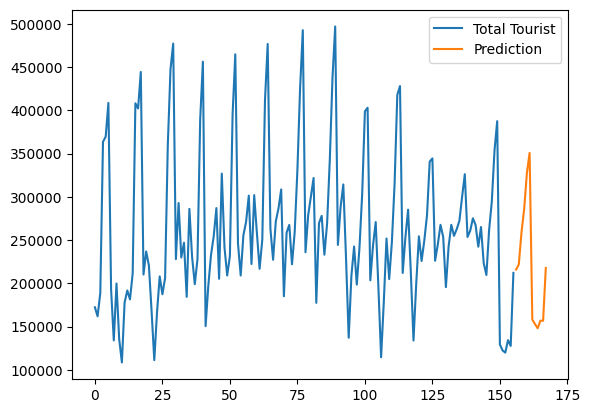

In [55]:
pd.concat([final_df['Total Tourist'],forecast_df],axis=1).plot()

In [56]:
test=df2[df2['Year']==2022]

In [57]:
imputed_df.head()

,Month,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,Year
0,1,172312.0,5076,5461.25,2549.17,39,36,11,46,11.666667,98,30.07,0,0,17,2010
1,2,161860.0,5076,5461.25,2549.17,16,32,16,37,16.111111,74,29.99,86,46,17,2010
2,3,188961.0,5076,5461.25,2549.17,35,62,17,63,25.555556,73,29.80,28,66,22,2010
3,4,363600.0,5076,5461.25,2549.17,39,100,21,67,31.111111,50,29.66,28,0,23,2010
4,5,369630.0,5076,5461.25,2549.17,17,12,24,77,32.777778,44,29.53,0,39,24,2010


In [58]:
test1=test.drop(columns=['Indian Tourist','Foreigner Tourist'])

In [59]:
test3=test1.drop(columns=['Month','Year'])

In [60]:
test3

,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends
144,223490,16057,18518.92,14268.33,24,8,47,39,12.222222,93,30.06,37,0,86
145,209688,16057,18518.92,14268.33,48,14,57,37,15.000000,82,30.04,83,34,72
146,261563,16057,18518.92,14268.33,57,17,69,46,17.222222,74,30.04,52,10,70
147,294487,16057,18518.92,14268.33,68,19,78,56,27.777778,76,29.87,68,28,77
148,353513,16057,18518.92,14268.33,61,18,100,62,31.666667,76,29.78,86,27,95
149,387518,16057,18518.92,14268.33,40,10,92,66,33.333333,86,29.59,95,11,95
150,129273,16057,18518.92,14268.33,31,7,58,33,30.000000,76,29.69,47,0,69
151,122404,16057,18518.92,14268.33,25,6,50,28,30.000000,76,29.82,45,10,65
152,119936,16057,18518.92,14268.33,33,9,57,34,28.888889,75,29.88,64,17,66
153,134331,16057,18518.92,14268.33,37,9,56,30,24.444444,76,29.97,47,0,60


In [61]:
test3

,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends
144,223490,16057,18518.92,14268.33,24,8,47,39,12.222222,93,30.06,37,0,86
145,209688,16057,18518.92,14268.33,48,14,57,37,15.000000,82,30.04,83,34,72
146,261563,16057,18518.92,14268.33,57,17,69,46,17.222222,74,30.04,52,10,70
147,294487,16057,18518.92,14268.33,68,19,78,56,27.777778,76,29.87,68,28,77
148,353513,16057,18518.92,14268.33,61,18,100,62,31.666667,76,29.78,86,27,95
149,387518,16057,18518.92,14268.33,40,10,92,66,33.333333,86,29.59,95,11,95
150,129273,16057,18518.92,14268.33,31,7,58,33,30.000000,76,29.69,47,0,69
151,122404,16057,18518.92,14268.33,25,6,50,28,30.000000,76,29.82,45,10,65
152,119936,16057,18518.92,14268.33,33,9,57,34,28.888889,75,29.88,64,17,66
153,134331,16057,18518.92,14268.33,37,9,56,30,24.444444,76,29.97,47,0,60


In [62]:
fimputed=imputed_df.drop(columns=['Month','Year'])

In [63]:
fimputed

,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends
0,172312.000000,5076,5461.25,2549.17,39,36,11,46,11.666667,98,30.07,0,0,17
1,161860.000000,5076,5461.25,2549.17,16,32,16,37,16.111111,74,29.99,86,46,17
2,188961.000000,5076,5461.25,2549.17,35,62,17,63,25.555556,73,29.80,28,66,22
3,363600.000000,5076,5461.25,2549.17,39,100,21,67,31.111111,50,29.66,28,0,23
4,369630.000000,5076,5461.25,2549.17,17,12,24,77,32.777778,44,29.53,0,39,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,260760.353821,17092,20971.17,12510.75,18,4,29,21,26.666667,86,29.74,46,34,45
140,275177.851779,17092,20971.17,12510.75,37,11,39,28,31.111111,76,29.81,39,22,51
141,267444.969120,17092,20971.17,12510.75,39,13,42,31,30.000000,87,30.00,69,10,49
142,242370.533852,17092,20971.17,12510.75,34,11,45,33,30.000000,84,30.00,68,14,49


In [64]:
shift=test3['Total Tourist'].shift()
shift=shift.to_frame()
shift.rename(columns = {'Total Tourist':'shift1'}, inplace = True)
test3=pd.concat([test3, shift], axis=1).dropna()

In [65]:
shift1=fimputed['Total Tourist'].shift()
shift1=shift1.to_frame()
shift1.rename(columns = {'Total Tourist':'shift1'}, inplace = True)
fimputed=pd.concat([fimputed, shift1], axis=1).dropna()

In [66]:
fimputed

,Total Tourist,GSDP values(Interpolated monthly) at current prices for Himachal Pradesh,Per capita Income(Himachal Pradesh) monthly,Per capita Income(India) monthly,Flights to Shimla: (Worldwide) Trends,Flights to Shimla: (India) Trends,Train to Shimla: Trends,Hotels in Shimla: Trends,Avg Temp:,Avg Humidity:,Avg Pressure:,Restaurants in Shimla: (Worldwide) Trends,Bus service in Shimla: (Worldwide) Trends,Shimla: (Worldwide)Trends,shift1
1,161860.000000,5076,5461.25,2549.17,16,32,16,37,16.111111,74,29.99,86,46,17,172312.000000
2,188961.000000,5076,5461.25,2549.17,35,62,17,63,25.555556,73,29.80,28,66,22,161860.000000
3,363600.000000,5076,5461.25,2549.17,39,100,21,67,31.111111,50,29.66,28,0,23,188961.000000
4,369630.000000,5076,5461.25,2549.17,17,12,24,77,32.777778,44,29.53,0,39,24,363600.000000
5,408653.000000,5076,5461.25,2549.17,31,27,21,75,31.666667,64,29.48,37,27,22,369630.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,260760.353821,17092,20971.17,12510.75,18,4,29,21,26.666667,86,29.74,46,34,45,253609.409034
140,275177.851779,17092,20971.17,12510.75,37,11,39,28,31.111111,76,29.81,39,22,51,260760.353821
141,267444.969120,17092,20971.17,12510.75,39,13,42,31,30.000000,87,30.00,69,10,49,275177.851779
142,242370.533852,17092,20971.17,12510.75,34,11,45,33,30.000000,84,30.00,68,14,49,267444.969120


In [67]:
y_train=fimputed.pop('Total Tourist')

In [68]:
y_test=test3.pop('Total Tourist')

<Axes: >

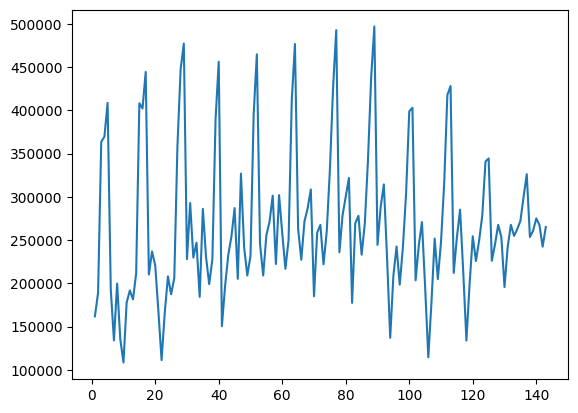

In [69]:
y_train.plot()

In [70]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y_train, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.6266257580335393
2. P-Value :  0.08761817381316617
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [71]:
y_train.to_frame()

,Total Tourist
1,161860.000000
2,188961.000000
3,363600.000000
4,369630.000000
5,408653.000000
...,...
139,260760.353821
140,275177.851779
141,267444.969120
142,242370.533852


In [72]:
y_train1=y_train.diff().dropna()

In [73]:
y_train1

2       27101.000000
3      174639.000000
4        6030.000000
5       39023.000000
6     -215862.000000
           ...      
139      7150.944787
140     14417.497958
141     -7732.882658
142    -25074.435269
143     22747.137420
Name: Total Tourist, Length: 142, dtype: float64

<Axes: >

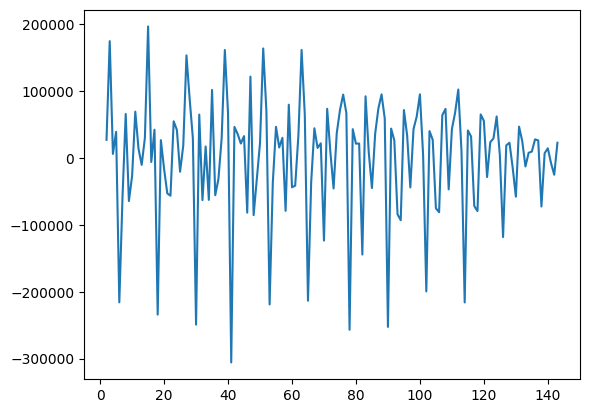

In [74]:
y_train1.plot()

In [75]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y_train1, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.690913430149669
2. P-Value :  1.4200935250877868e-11
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [76]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

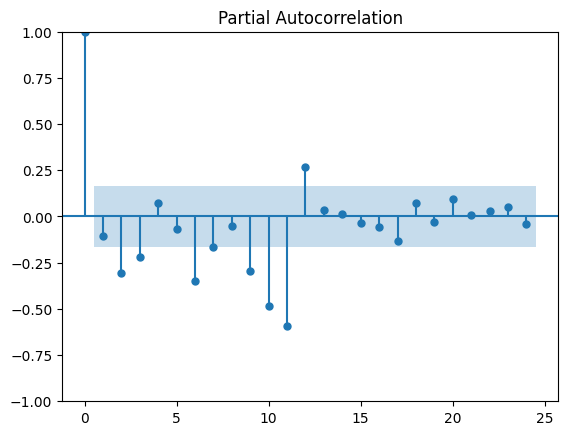

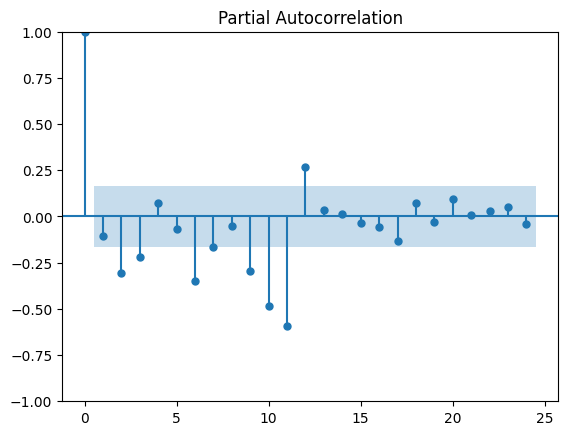

In [77]:
plot_pacf(y_train1,lags=24)

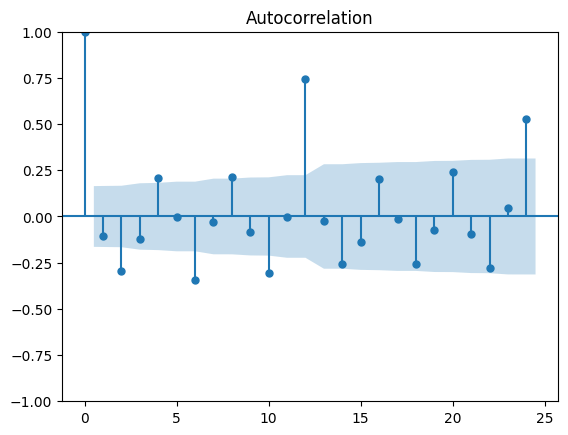

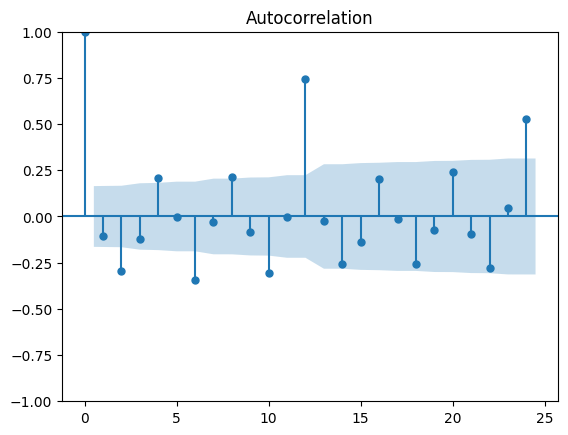

In [78]:
plot_acf(y_train1,lags=24)

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX                                                  #SARIMAX Only on Total Tourist
model=SARIMAX(y_train,order=(3,1,4),seasonal_order=(3,1,4,12))                                         #(p,d,q) p=3 as observed from pacf plot,q=4 observed from acf plot,d=1 as first difference is used for stationarity
model_fit=model.fit()                                                                                 #trained till 2021 and tested on 2022
y_pred=model_fit.predict(start=y_test.index[0],end=y_test.index[-1])

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11509D+01    |proj g|=  4.61226D-01


 This problem is unconstrained.



At iterate    5    f=  1.10336D+01    |proj g|=  3.03805D-02

At iterate   10    f=  1.10290D+01    |proj g|=  4.28307D-03

At iterate   15    f=  1.10288D+01    |proj g|=  4.58845D-03

At iterate   20    f=  1.10250D+01    |proj g|=  3.70459D-02

At iterate   25    f=  1.10218D+01    |proj g|=  2.01444D-02

At iterate   30    f=  1.10206D+01    |proj g|=  1.23585D-02

At iterate   35    f=  1.10200D+01    |proj g|=  5.36792D-03

At iterate   40    f=  1.10197D+01    |proj g|=  5.61936D-03

At iterate   45    f=  1.10195D+01    |proj g|=  3.13503D-03

At iterate   50    f=  1.10194D+01    |proj g|=  4.59335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [80]:
y_pred

145    266919.366660
146    311585.722391
147    324905.383047
148    327459.311315
149    257749.827486
150    273855.051445
151    270670.885650
152    268986.090888
153    234995.836013
154    266688.023181
155    257407.239490
Name: predicted_mean, dtype: float64

In [81]:
y_test

145    209688
146    261563
147    294487
148    353513
149    387518
150    129273
151    122404
152    119936
153    134331
154    127651
155    212113
Name: Total Tourist, dtype: int64

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
mean_squared_error(y_test, y_pred,squared=False)

104811.86310958628

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX                                                                 #SARIMAX With exogenous variables
model=SARIMAX(y_train,exog=fimputed,order=(3,1,4),seasonal_order=(3,1,4,12))                                                  #trained till 2021 and tested on 2022
model_fit=model.fit()
y_pred=model_fit.predict(start=y_test.index[0],end=y_test.index[-1],exog=test3)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14241D+01    |proj g|=  1.49687D+00


 This problem is unconstrained.



At iterate    5    f=  1.10411D+01    |proj g|=  5.28215D-02

At iterate   10    f=  1.10295D+01    |proj g|=  7.94681D-02

At iterate   15    f=  1.10237D+01    |proj g|=  1.96572D-02

At iterate   20    f=  1.10193D+01    |proj g|=  1.90555D-02

At iterate   25    f=  1.10176D+01    |proj g|=  2.99686D-02

At iterate   30    f=  1.10154D+01    |proj g|=  1.30878D-02

At iterate   35    f=  1.10148D+01    |proj g|=  2.11278D-02

At iterate   40    f=  1.10093D+01    |proj g|=  2.11764D-01

At iterate   45    f=  1.10060D+01    |proj g|=  7.07315D-02

At iterate   50    f=  1.10051D+01    |proj g|=  1.39422D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Provided exogenous values are not of the appropriate shape. Required (13, 14), got (11, 14).

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_test, y_pred,squared=False)

In [ ]:
model = pm.auto_arima(y_train,                                                                                           #AUTO ARIMA
                        m=12, seasonal=True,                                                                             ##trained till 2021 and tested on 2022
                      start_p=0, start_q=0, max_order=7, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)
model_fit=model.fit(y_train)
y_pred=model_fit.predict(n_periods=12)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Regressor_rf = RandomForestRegressor(n_jobs=-1, max_depth=12,
                                       n_estimators=300,)
Regressor_rf.fit(fimputed, y_train)

In [ ]:
y_pred = Regressor_rf.predict(test3)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators=200,max_depth =10,learning_rate=0.05,)

In [ ]:
model.fit(fimputed, y_train)

In [ ]:
y_pred1=model.predict(test3)

In [ ]:
mean_squared_error(y_test, y_pred1,squared=False)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_train_m=imputed_df.pop('Total Tourist')

In [ ]:
imputed_df1=imputed_df.drop(columns='Year')

In [ ]:
test3_m=test1.pop('Total Tourist')

In [ ]:
test1_m=test1.drop(columns='Year')

In [ ]:
from sklearn.ensemble import RandomForestRegressor             #RandomForest with inclusion of month as independent variable
Regressor_rf = RandomForestRegressor(n_jobs=-1, max_depth=12,          #trained till 2021 and tested on 2022
                                       n_estimators=300,)
Regressor_rf.fit(imputed_df1, y_train_m)

In [ ]:
y_pred=Regressor_rf.predict(test1_m)

In [ ]:
test1_m

In [ ]:
mean_squared_error(y_test, y_pred,squared=False)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX               # SARIMAX with inclusion of month as external indicator(independent variable(exogenous))
model=SARIMAX(y_train_m,exog=imputed_df1,order=(3,1,4),seasonal_order=(3,1,4,12))
model_fit=model.fit()
y_pred=model_fit.predict(start=y_test.index[0],end=y_test.index[-1],exog=test1_m)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False)

In [ ]:
pd.concat([final_df['Total Tourist'],forecast_df],axis=1).plot()